# Variable Selection Analysis

**Date:** 25 September 2025

**Topic:** Feature selection techniques for regression models

This notebook demonstrates:
1. Correlation Analysis
2. Mutual Information for Feature Selection
3. Interactive Visualization Techniques
4. California Housing Dataset Analysis

## 1. Setup and Data Loading

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import plotly.graph_objects as go

# Set plotting parameters
plt.style.use('default')
sns.set_palette("husl")

### 1.1 California Housing Dataset
Loading the California Housing dataset which contains information about house values and demographic features.

In [2]:
# Load California Housing dataset
california = fetch_california_housing(as_frame=True)

# Display dataset structure
print("Dataset Information:")
print(f"Number of samples: {california.data.shape[0]}")
print(f"Number of features: {california.data.shape[1]}")
print(f"Target variable: {california.target_names[0]}")
print("\nFeature names:")
for i, feature in enumerate(california.feature_names):
    print(f"{i+1}. {feature}")

Dataset Information:
Number of samples: 20640
Number of features: 8
Target variable: MedHouseVal

Feature names:
1. MedInc
2. HouseAge
3. AveRooms
4. AveBedrms
5. Population
6. AveOccup
7. Latitude
8. Longitude


### 1.2 Data Preparation

In [3]:
# Combine features and target into a single DataFrame
df = pd.concat([california.data, california.target], axis=1)

# Export for future use
df.to_csv("housing.csv", index=False)

# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (20640, 9)

First few rows:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 1.3 Data Quality Check

In [4]:
# Check data types
print("Data types:")
print(df.dtypes)
print("\n" + "="*50)

# Check for missing values
print("\nMissing values per column:")
missing_values = df.isna().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("\n✅ No missing values found in the dataset")
else:
    print(f"\n⚠️ Total missing values: {missing_values.sum()}")

Data types:
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


Missing values per column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

✅ No missing values found in the dataset


## 2. Correlation Analysis

### 2.1 Correlation Matrix Calculation

In [5]:
# Calculate correlation matrix for numeric features
numeric_features = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_features.corr()

# Display correlation with target variable
target_correlations = correlation_matrix['MedHouseVal'].drop('MedHouseVal').sort_values(key=abs, ascending=False)

print("Correlation with Target Variable (MedHouseVal):")
print("=" * 45)
for feature, corr in target_correlations.items():
    direction = "📈" if corr > 0 else "📉"
    strength = "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
    print(f"{feature:12}: {corr:6.3f} {direction} ({strength})")

Correlation with Target Variable (MedHouseVal):
MedInc      :  0.688 📈 (Strong)
AveRooms    :  0.152 📈 (Weak)
Latitude    : -0.144 📉 (Weak)
HouseAge    :  0.106 📈 (Weak)
AveBedrms   : -0.047 📉 (Weak)
Longitude   : -0.046 📉 (Weak)
Population  : -0.025 📉 (Weak)
AveOccup    : -0.024 📉 (Weak)


### 2.2 Interactive Correlation Heatmap

In [7]:
# Create interactive correlation heatmap using Plotly
fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.columns,
        text=np.around(correlation_matrix.values, decimals=3),
        texttemplate="%{text}",
        textfont={"size": 10},
        colorscale="RdBu",
        zmid=0,
        colorbar=dict(
            title="Correlation",
            titleside="right"
        )
    )
)

fig.update_layout(
    title={
        'text': "Feature Correlation Matrix - California Housing Dataset",
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis_title="Features",
    yaxis_title="Features",
    width=800,
    height=700,
    font=dict(size=12)
)

fig.show()

ValueError: Invalid property specified for object of type plotly.graph_objs.heatmap.ColorBar: 'titleside'

Did you mean "title"?

    Valid properties:
        bgcolor
            Sets the color of padded area.
        bordercolor
            Sets the axis line color.
        borderwidth
            Sets the width (in px) or the border enclosing this
            color bar.
        dtick
            Sets the step in-between ticks on this axis. Use with
            `tick0`. Must be a positive number, or special strings
            available to "log" and "date" axes. If the axis `type`
            is "log", then ticks are set every 10^(n*dtick) where n
            is the tick number. For example, to set a tick mark at
            1, 10, 100, 1000, ... set dtick to 1. To set tick marks
            at 1, 100, 10000, ... set dtick to 2. To set tick marks
            at 1, 5, 25, 125, 625, 3125, ... set dtick to
            log_10(5), or 0.69897000433. "log" has several special
            values; "L<f>", where `f` is a positive number, gives
            ticks linearly spaced in value (but not position). For
            example `tick0` = 0.1, `dtick` = "L0.5" will put ticks
            at 0.1, 0.6, 1.1, 1.6 etc. To show powers of 10 plus
            small digits between, use "D1" (all digits) or "D2"
            (only 2 and 5). `tick0` is ignored for "D1" and "D2".
            If the axis `type` is "date", then you must convert the
            time to milliseconds. For example, to set the interval
            between ticks to one day, set `dtick` to 86400000.0.
            "date" also has special values "M<n>" gives ticks
            spaced by a number of months. `n` must be a positive
            integer. To set ticks on the 15th of every third month,
            set `tick0` to "2000-01-15" and `dtick` to "M3". To set
            ticks every 4 years, set `dtick` to "M48"
        exponentformat
            Determines a formatting rule for the tick exponents.
            For example, consider the number 1,000,000,000. If
            "none", it appears as 1,000,000,000. If "e", 1e+9. If
            "E", 1E+9. If "power", 1x10^9 (with 9 in a super
            script). If "SI", 1G. If "B", 1B. "SI" uses prefixes
            from "femto" f (10^-15) to "tera" T (10^12). *SI
            extended* covers instead the full SI range from
            "quecto" q (10^-30) to "quetta" Q (10^30). If "SI" or
            *SI extended* is used and the exponent is beyond the
            above ranges, the formatting rule will automatically be
            switched to the power notation.
        labelalias
            Replacement text for specific tick or hover labels. For
            example using {US: 'USA', CA: 'Canada'} changes US to
            USA and CA to Canada. The labels we would have shown
            must match the keys exactly, after adding any
            tickprefix or ticksuffix. For negative numbers the
            minus sign symbol used (U+2212) is wider than the
            regular ascii dash. That means you need to use −1
            instead of -1. labelalias can be used with any axis
            type, and both keys (if needed) and values (if desired)
            can include html-like tags or MathJax.
        len
            Sets the length of the color bar This measure excludes
            the padding of both ends. That is, the color bar length
            is this length minus the padding on both ends.
        lenmode
            Determines whether this color bar's length (i.e. the
            measure in the color variation direction) is set in
            units of plot "fraction" or in *pixels. Use `len` to
            set the value.
        minexponent
            Hide SI prefix for 10^n if |n| is below this number.
            This only has an effect when `tickformat` is "SI" or
            "B".
        nticks
            Specifies the maximum number of ticks for the
            particular axis. The actual number of ticks will be
            chosen automatically to be less than or equal to
            `nticks`. Has an effect only if `tickmode` is set to
            "auto".
        orientation
            Sets the orientation of the colorbar.
        outlinecolor
            Sets the axis line color.
        outlinewidth
            Sets the width (in px) of the axis line.
        separatethousands
            If "true", even 4-digit integers are separated
        showexponent
            If "all", all exponents are shown besides their
            significands. If "first", only the exponent of the
            first tick is shown. If "last", only the exponent of
            the last tick is shown. If "none", no exponents appear.
        showticklabels
            Determines whether or not the tick labels are drawn.
        showtickprefix
            If "all", all tick labels are displayed with a prefix.
            If "first", only the first tick is displayed with a
            prefix. If "last", only the last tick is displayed with
            a suffix. If "none", tick prefixes are hidden.
        showticksuffix
            Same as `showtickprefix` but for tick suffixes.
        thickness
            Sets the thickness of the color bar This measure
            excludes the size of the padding, ticks and labels.
        thicknessmode
            Determines whether this color bar's thickness (i.e. the
            measure in the constant color direction) is set in
            units of plot "fraction" or in "pixels". Use
            `thickness` to set the value.
        tick0
            Sets the placement of the first tick on this axis. Use
            with `dtick`. If the axis `type` is "log", then you
            must take the log of your starting tick (e.g. to set
            the starting tick to 100, set the `tick0` to 2) except
            when `dtick`=*L<f>* (see `dtick` for more info). If the
            axis `type` is "date", it should be a date string, like
            date data. If the axis `type` is "category", it should
            be a number, using the scale where each category is
            assigned a serial number from zero in the order it
            appears.
        tickangle
            Sets the angle of the tick labels with respect to the
            horizontal. For example, a `tickangle` of -90 draws the
            tick labels vertically.
        tickcolor
            Sets the tick color.
        tickfont
            Sets the color bar's tick label font
        tickformat
            Sets the tick label formatting rule using d3 formatting
            mini-languages which are very similar to those in
            Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display "09~15~23.46"
        tickformatstops
            A tuple of :class:`plotly.graph_objects.heatmap.colorba
            r.Tickformatstop` instances or dicts with compatible
            properties
        tickformatstopdefaults
            When used in a template (as layout.template.data.heatma
            p.colorbar.tickformatstopdefaults), sets the default
            property values to use for elements of
            heatmap.colorbar.tickformatstops
        ticklabeloverflow
            Determines how we handle tick labels that would
            overflow either the graph div or the domain of the
            axis. The default value for inside tick labels is *hide
            past domain*. In other cases the default is *hide past
            div*.
        ticklabelposition
            Determines where tick labels are drawn relative to the
            ticks. Left and right options are used when
            `orientation` is "h", top and bottom when `orientation`
            is "v".
        ticklabelstep
            Sets the spacing between tick labels as compared to the
            spacing between ticks. A value of 1 (default) means
            each tick gets a label. A value of 2 means shows every
            2nd label. A larger value n means only every nth tick
            is labeled. `tick0` determines which labels are shown.
            Not implemented for axes with `type` "log" or
            "multicategory", or when `tickmode` is "array".
        ticklen
            Sets the tick length (in px).
        tickmode
            Sets the tick mode for this axis. If "auto", the number
            of ticks is set via `nticks`. If "linear", the
            placement of the ticks is determined by a starting
            position `tick0` and a tick step `dtick` ("linear" is
            the default value if `tick0` and `dtick` are provided).
            If "array", the placement of the ticks is set via
            `tickvals` and the tick text is `ticktext`. ("array" is
            the default value if `tickvals` is provided).
        tickprefix
            Sets a tick label prefix.
        ticks
            Determines whether ticks are drawn or not. If "", this
            axis' ticks are not drawn. If "outside" ("inside"),
            this axis' are drawn outside (inside) the axis lines.
        ticksuffix
            Sets a tick label suffix.
        ticktext
            Sets the text displayed at the ticks position via
            `tickvals`. Only has an effect if `tickmode` is set to
            "array". Used with `tickvals`.
        ticktextsrc
            Sets the source reference on Chart Studio Cloud for
            `ticktext`.
        tickvals
            Sets the values at which ticks on this axis appear.
            Only has an effect if `tickmode` is set to "array".
            Used with `ticktext`.
        tickvalssrc
            Sets the source reference on Chart Studio Cloud for
            `tickvals`.
        tickwidth
            Sets the tick width (in px).
        title
            :class:`plotly.graph_objects.heatmap.colorbar.Title`
            instance or dict with compatible properties
        x
            Sets the x position with respect to `xref` of the color
            bar (in plot fraction). When `xref` is "paper",
            defaults to 1.02 when `orientation` is "v" and 0.5 when
            `orientation` is "h". When `xref` is "container",
            defaults to 1 when `orientation` is "v" and 0.5 when
            `orientation` is "h". Must be between 0 and 1 if `xref`
            is "container" and between "-2" and 3 if `xref` is
            "paper".
        xanchor
            Sets this color bar's horizontal position anchor. This
            anchor binds the `x` position to the "left", "center"
            or "right" of the color bar. Defaults to "left" when
            `orientation` is "v" and "center" when `orientation` is
            "h".
        xpad
            Sets the amount of padding (in px) along the x
            direction.
        xref
            Sets the container `x` refers to. "container" spans the
            entire `width` of the plot. "paper" refers to the width
            of the plotting area only.
        y
            Sets the y position with respect to `yref` of the color
            bar (in plot fraction). When `yref` is "paper",
            defaults to 0.5 when `orientation` is "v" and 1.02 when
            `orientation` is "h". When `yref` is "container",
            defaults to 0.5 when `orientation` is "v" and 1 when
            `orientation` is "h". Must be between 0 and 1 if `yref`
            is "container" and between "-2" and 3 if `yref` is
            "paper".
        yanchor
            Sets this color bar's vertical position anchor This
            anchor binds the `y` position to the "top", "middle" or
            "bottom" of the color bar. Defaults to "middle" when
            `orientation` is "v" and "bottom" when `orientation` is
            "h".
        ypad
            Sets the amount of padding (in px) along the y
            direction.
        yref
            Sets the container `y` refers to. "container" spans the
            entire `height` of the plot. "paper" refers to the
            height of the plotting area only.
        
Did you mean "title"?

Bad property path:
titleside
^^^^^^^^^

### 2.3 Static Correlation Visualization

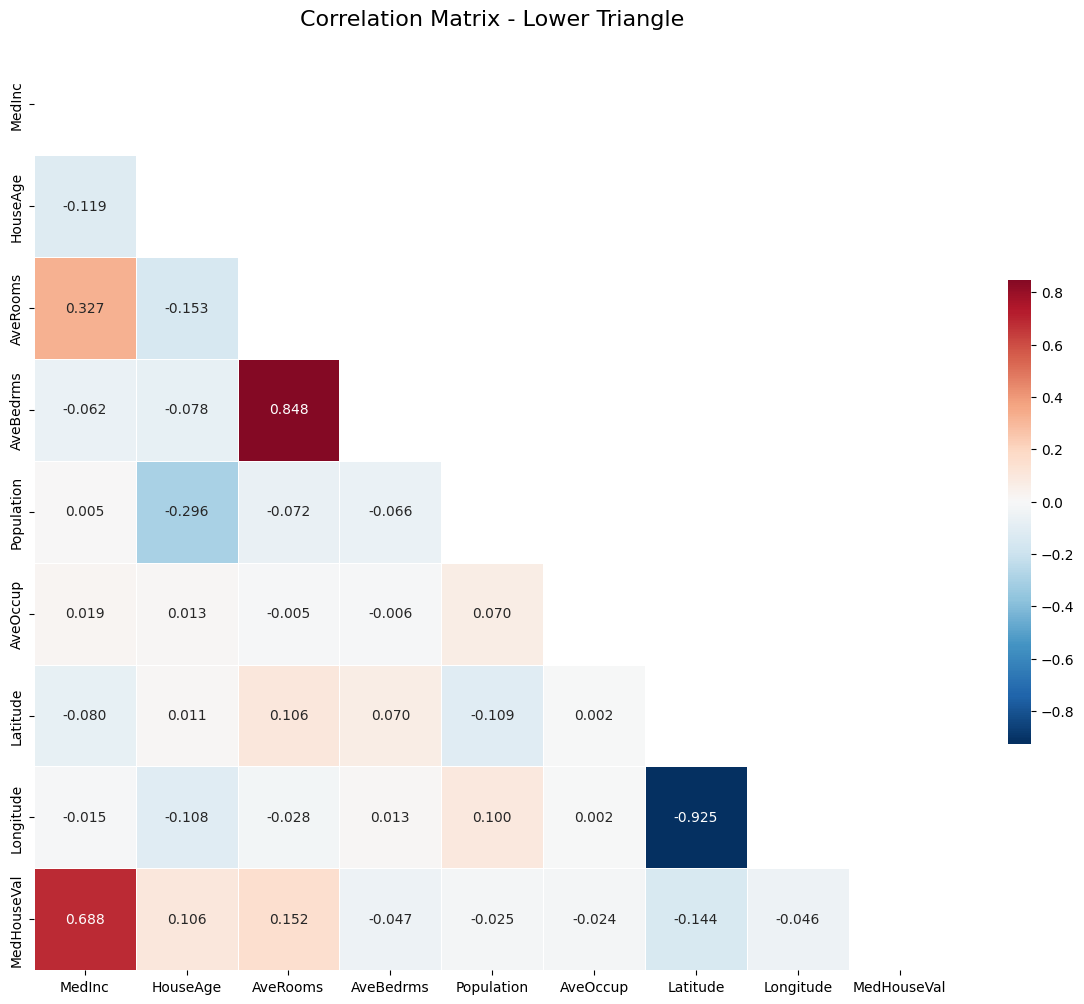

In [8]:
# Create static correlation heatmap using seaborn
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    cmap='RdBu_r',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    fmt='.3f'
)

plt.title('Correlation Matrix - Lower Triangle', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

## 3. Mutual Information Analysis

### 3.1 Data Splitting for Analysis

In [9]:
# Split the data for mutual information calculation
X_train, X_test, y_train, y_test = train_test_split(
    california.data, 
    california.target, 
    test_size=0.25,
    random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Feature dimensions: {X_train.shape[1]} features")

Training set size: 15480 samples
Test set size: 5160 samples
Feature dimensions: 8 features


### 3.2 Mutual Information Calculation
Mutual information measures the dependency between variables, capturing both linear and non-linear relationships.

In [10]:
# Calculate mutual information scores
mi_scores = mutual_info_regression(X_train, y_train, random_state=42)
mi_series = pd.Series(mi_scores, index=X_train.columns).sort_values(ascending=False)

# Display mutual information results
print("Mutual Information Scores:")
print("=" * 35)
mi_df = mi_series.to_frame("mutual_information")
mi_df['rank'] = range(1, len(mi_df) + 1)
mi_df = mi_df[['rank', 'mutual_information']]

for feature, row in mi_df.iterrows():
    print(f"{row['rank']:2}. {feature:12}: {row['mutual_information']:.4f}")

display(mi_df)

Mutual Information Scores:
1.0. Longitude   : 0.3858
2.0. MedInc      : 0.3835
3.0. Latitude    : 0.3637
4.0. AveRooms    : 0.0967
5.0. AveOccup    : 0.0739
6.0. HouseAge    : 0.0338
7.0. Population  : 0.0271
8.0. AveBedrms   : 0.0245


,rank,mutual_information
Longitude,1,0.385799
MedInc,2,0.383474
Latitude,3,0.363740
AveRooms,4,0.096668
AveOccup,5,0.073894
HouseAge,6,0.033754
Population,7,0.027121
AveBedrms,8,0.024474


### 3.3 Mutual Information Visualization

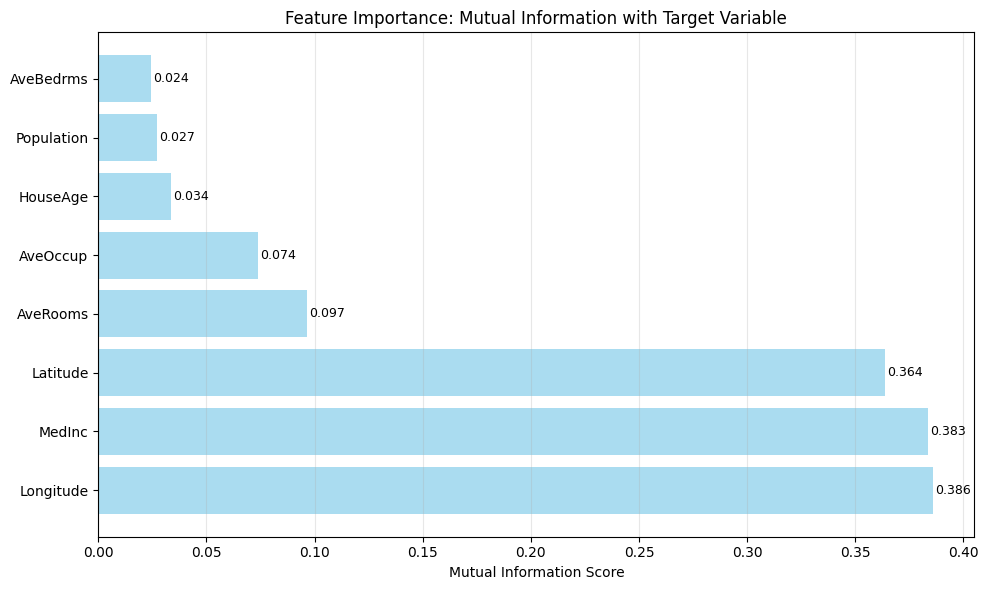

In [11]:
# Create horizontal bar plot for mutual information
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(mi_series)), mi_series.values, color='skyblue', alpha=0.7)
plt.yticks(range(len(mi_series)), mi_series.index)
plt.xlabel('Mutual Information Score')
plt.title('Feature Importance: Mutual Information with Target Variable')
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (feature, score) in enumerate(mi_series.items()):
    plt.text(score + 0.001, i, f'{score:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

### 3.4 Alternative Visualization - Vertical Bar Plot

/var/folders/bh/cdlv0vwj4vn8mznhbcsmms640000gn/T/ipykernel_40173/3174695198.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




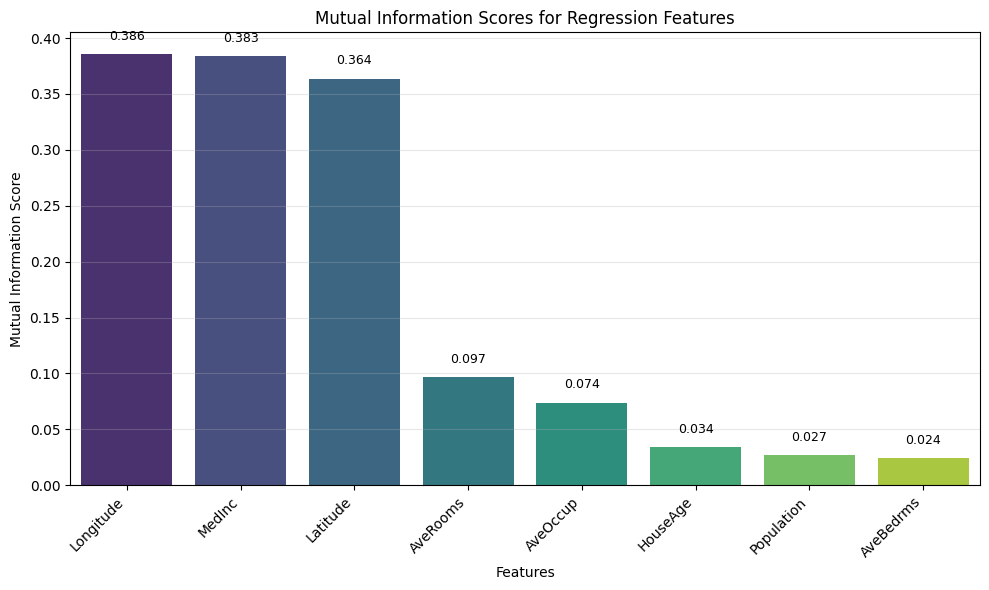

In [12]:
# Create vertical bar plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=mi_series.index, 
    y=mi_series.values,
    palette='viridis'
)

plt.xticks(rotation=45, ha="right")
plt.ylabel('Mutual Information Score')
plt.xlabel('Features')
plt.title('Mutual Information Scores for Regression Features')
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for i, v in enumerate(mi_series.values):
    ax.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## 4. Comparison: Correlation vs Mutual Information

### 4.1 Side-by-Side Comparison

In [13]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Correlation': target_correlations,
    'Mutual_Information': mi_series
})

# Add absolute correlation for ranking
comparison_df['Abs_Correlation'] = comparison_df['Correlation'].abs()

# Sort by mutual information (descending)
comparison_df = comparison_df.sort_values('Mutual_Information', ascending=False)

print("Feature Ranking Comparison:")
print("=" * 60)
print(f"{'Feature':<12} {'Correlation':<12} {'MI Score':<10} {'MI Rank':<8} {'Corr Rank':<10}")
print("-" * 60)

# Calculate ranks
mi_ranks = comparison_df['Mutual_Information'].rank(ascending=False)
corr_ranks = comparison_df['Abs_Correlation'].rank(ascending=False)

for feature, row in comparison_df.iterrows():
    mi_rank = int(mi_ranks[feature])
    corr_rank = int(corr_ranks[feature])
    print(f"{feature:<12} {row['Correlation']:>9.3f}   {row['Mutual_Information']:>7.3f}   {mi_rank:>5}     {corr_rank:>7}")

display(comparison_df[['Correlation', 'Mutual_Information']].round(4))

Feature Ranking Comparison:
Feature      Correlation  MI Score   MI Rank  Corr Rank 
------------------------------------------------------------
Longitude       -0.046     0.386       1           6
MedInc           0.688     0.383       2           1
Latitude        -0.144     0.364       3           3
AveRooms         0.152     0.097       4           2
AveOccup        -0.024     0.074       5           8
HouseAge         0.106     0.034       6           4
Population      -0.025     0.027       7           7
AveBedrms       -0.047     0.024       8           5


,Correlation,Mutual_Information
Longitude,-0.0460,0.3858
MedInc,0.6881,0.3835
Latitude,-0.1442,0.3637
AveRooms,0.1519,0.0967
AveOccup,-0.0237,0.0739
HouseAge,0.1056,0.0338
Population,-0.0246,0.0271
AveBedrms,-0.0467,0.0245


### 4.2 Scatter Plot Comparison

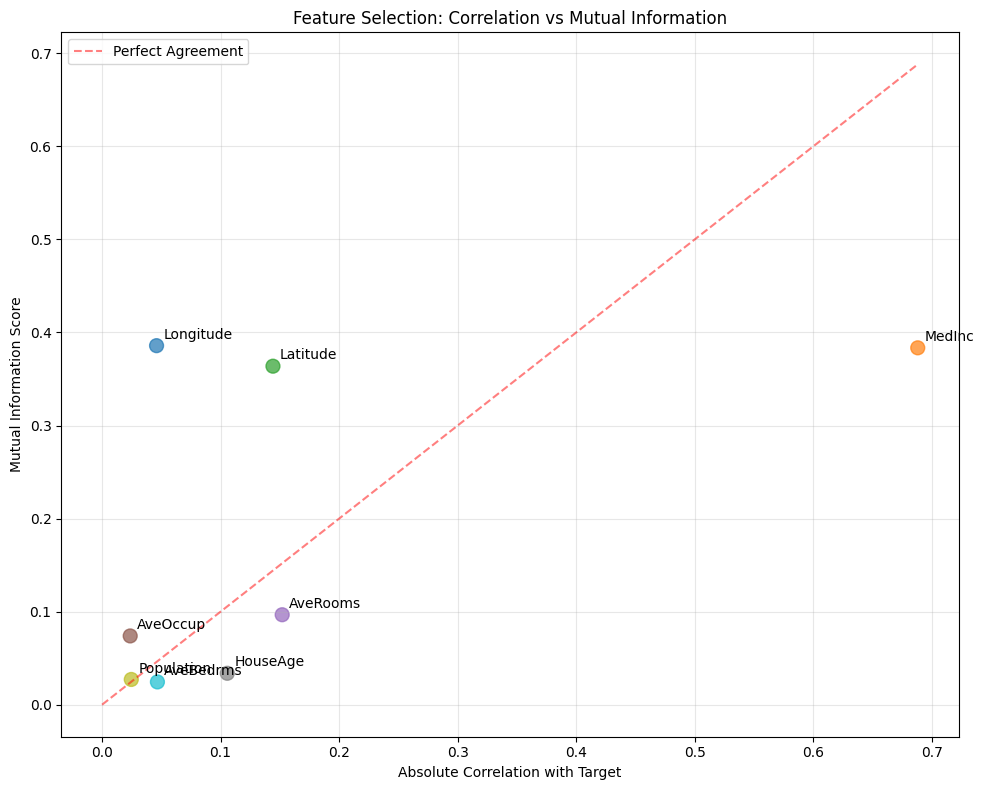

In [14]:
# Create scatter plot comparing correlation vs mutual information
plt.figure(figsize=(10, 8))

scatter = plt.scatter(
    comparison_df['Abs_Correlation'], 
    comparison_df['Mutual_Information'],
    s=100, 
    alpha=0.7,
    c=range(len(comparison_df)),
    cmap='tab10'
)

# Add feature labels
for feature, row in comparison_df.iterrows():
    plt.annotate(
        feature, 
        (row['Abs_Correlation'], row['Mutual_Information']),
        xytext=(5, 5), 
        textcoords='offset points',
        fontsize=10,
        ha='left'
    )

plt.xlabel('Absolute Correlation with Target')
plt.ylabel('Mutual Information Score')
plt.title('Feature Selection: Correlation vs Mutual Information')
plt.grid(True, alpha=0.3)

# Add diagonal reference line
max_val = max(comparison_df['Abs_Correlation'].max(), comparison_df['Mutual_Information'].max())
plt.plot([0, max_val], [0, max_val], 'r--', alpha=0.5, label='Perfect Agreement')
plt.legend()

plt.tight_layout()
plt.show()

## 5. Feature Selection Recommendations

### 5.1 Top Features by Different Criteria

In [15]:
# Define selection criteria
n_features = 5

# Top features by mutual information
top_mi_features = mi_series.head(n_features).index.tolist()

# Top features by absolute correlation
top_corr_features = target_correlations.abs().sort_values(ascending=False).head(n_features).index.tolist()

# Combined approach (average rank)
comparison_df['Combined_Rank'] = (mi_ranks + corr_ranks) / 2
top_combined_features = comparison_df.sort_values('Combined_Rank').head(n_features).index.tolist()

print(f"Top {n_features} Feature Recommendations:")
print("=" * 50)

print("\n1. By Mutual Information:")
for i, feature in enumerate(top_mi_features, 1):
    score = mi_series[feature]
    print(f"   {i}. {feature:12} (MI: {score:.4f})")

print("\n2. By Absolute Correlation:")
for i, feature in enumerate(top_corr_features, 1):
    score = abs(target_correlations[feature])
    print(f"   {i}. {feature:12} (|Corr|: {score:.4f})")

print("\n3. By Combined Ranking:")
for i, feature in enumerate(top_combined_features, 1):
    mi_score = mi_series[feature]
    corr_score = target_correlations[feature]
    print(f"   {i}. {feature:12} (MI: {mi_score:.4f}, Corr: {corr_score:.4f})")

# Find consensus features
consensus_features = set(top_mi_features) & set(top_corr_features) & set(top_combined_features)
print(f"\n🎯 Consensus Features (appear in all top-{n_features} lists): {list(consensus_features)}")

Top 5 Feature Recommendations:

1. By Mutual Information:
   1. Longitude    (MI: 0.3858)
   2. MedInc       (MI: 0.3835)
   3. Latitude     (MI: 0.3637)
   4. AveRooms     (MI: 0.0967)
   5. AveOccup     (MI: 0.0739)

2. By Absolute Correlation:
   1. MedInc       (|Corr|: 0.6881)
   2. AveRooms     (|Corr|: 0.1519)
   3. Latitude     (|Corr|: 0.1442)
   4. HouseAge     (|Corr|: 0.1056)
   5. AveBedrms    (|Corr|: 0.0467)

3. By Combined Ranking:
   1. MedInc       (MI: 0.3835, Corr: 0.6881)
   2. Latitude     (MI: 0.3637, Corr: -0.1442)
   3. AveRooms     (MI: 0.0967, Corr: 0.1519)
   4. Longitude    (MI: 0.3858, Corr: -0.0460)
   5. HouseAge     (MI: 0.0338, Corr: 0.1056)

🎯 Consensus Features (appear in all top-5 lists): ['MedInc', 'AveRooms', 'Latitude']


## 6. Summary and Insights

### Key Findings

In [16]:
# Summary statistics
print("VARIABLE SELECTION ANALYSIS SUMMARY")
print("=" * 50)

print(f"\n📊 Dataset Overview:")
print(f"   • Total samples: {df.shape[0]:,}")
print(f"   • Total features: {df.shape[1]-1}")
print(f"   • Target variable: {california.target_names[0]}")

print(f"\n🔍 Correlation Analysis:")
strongest_corr = target_correlations.abs().max()
strongest_feature = target_correlations.abs().idxmax()
print(f"   • Strongest correlation: {strongest_feature} ({target_correlations[strongest_feature]:.3f})")
print(f"   • Average absolute correlation: {target_correlations.abs().mean():.3f}")

print(f"\n🎯 Mutual Information Analysis:")
best_mi_feature = mi_series.idxmax()
best_mi_score = mi_series.max()
print(f"   • Highest MI score: {best_mi_feature} ({best_mi_score:.4f})")
print(f"   • Average MI score: {mi_series.mean():.4f}")

print(f"\n💡 Recommendations:")
print(f"   • Primary features: {', '.join(top_combined_features[:3])}")
print(f"   • Method: Both correlation and mutual information agree on top performers")
print(f"   • Consider: {strongest_feature} shows strongest linear relationship")
print(f"   • Note: Mutual information captures non-linear relationships better than correlation")

VARIABLE SELECTION ANALYSIS SUMMARY

📊 Dataset Overview:
   • Total samples: 20,640
   • Total features: 8
   • Target variable: MedHouseVal

🔍 Correlation Analysis:
   • Strongest correlation: MedInc (0.688)
   • Average absolute correlation: 0.154

🎯 Mutual Information Analysis:
   • Highest MI score: Longitude (0.3858)
   • Average MI score: 0.1736

💡 Recommendations:
   • Primary features: MedInc, Latitude, AveRooms
   • Method: Both correlation and mutual information agree on top performers
   • Consider: MedInc shows strongest linear relationship
   • Note: Mutual information captures non-linear relationships better than correlation
